# **Предварительный анализ данных, данные о статистике топовых Youtube каналов**

In [1]:
!gdown 17082fzXw7PfbQfkTxazFSTOepx0x-BUn

Downloading...
From: https://drive.google.com/uc?id=17082fzXw7PfbQfkTxazFSTOepx0x-BUn
To: /content/global_yt_stats.csv
100% 199k/199k [00:00<00:00, 60.5MB/s]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Выгружаем данные по статистике топ ютуб каналов. Отмечу, что даже при такой кодировке будет немного мусорных символов, тк кто-то в названии канала оставляет смайлики и иконки.

In [3]:
df = pd.read_csv('global_yt_stats.csv', encoding= 'cp1251')
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


Взгляд на данные на карте мира

<ipython-input-4-109192bfcc5a>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


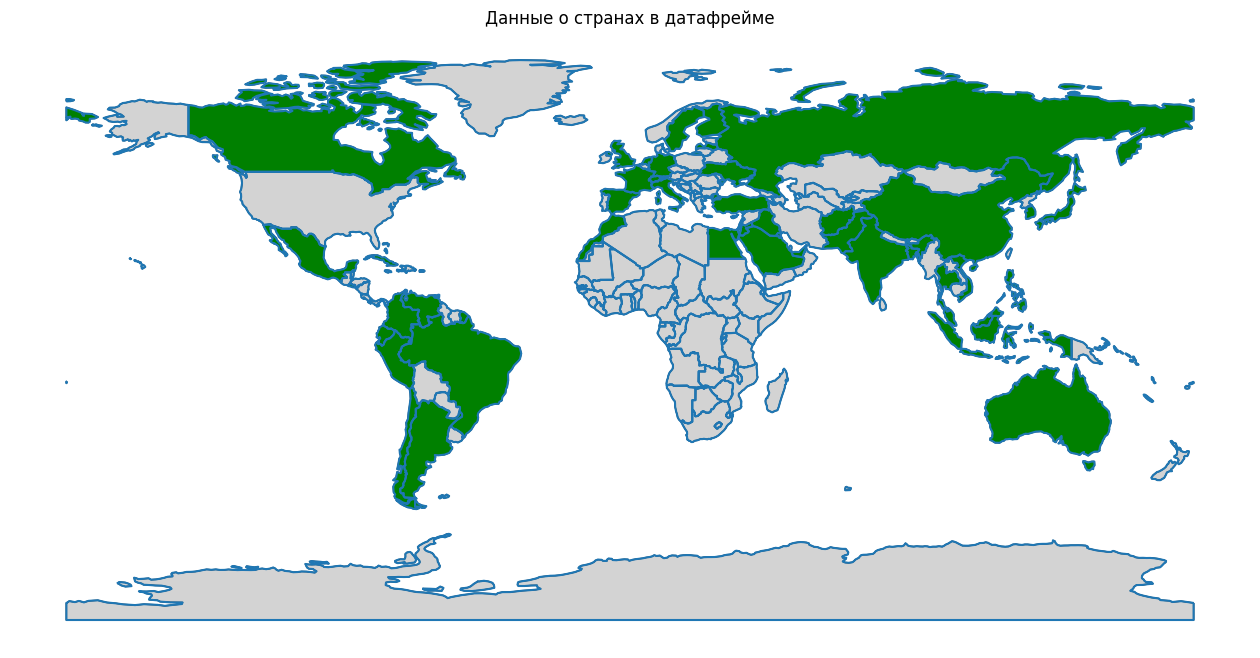

In [4]:
import geopandas as gpd

# Загрузка данных о границах стран
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Построение карты с закрашенными странами
fig, ax = plt.subplots(figsize=(16, 12))
world.boundary.plot(ax=ax)
world.plot(ax=ax, color='lightgrey', edgecolor='black')

country_geom = world[world['name'].isin(df['Country'])]
country_geom.plot(ax=ax, color='green')

plt.title('Данные о странах в датафрейме')
plt.axis('off')
plt.show()

# Exploratory Data Analysis:

Меняем единицы измерения на привычные и column names в соответствии с новыми единицами измерения

In [5]:
df['subscribers'] = df['subscribers'] / 10 ** 6
df['video views'] = df['video views'] / 10 ** 6
df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'] / 10 ** 6
df['lowest_monthly_earnings'] = df['lowest_monthly_earnings'] / 10 ** 3
df['highest_monthly_earnings'] = df['highest_monthly_earnings'] / 10 ** 3
df['lowest_yearly_earnings'] = df['lowest_yearly_earnings'] / 10 ** 3
df['highest_yearly_earnings'] = df['highest_yearly_earnings'] / 10 ** 3
df['subscribers_for_last_30_days'] = df['subscribers_for_last_30_days'] / 10 ** 6
df['Population'] = df['Population'] / 10 ** 6
df['Urban_population'] = df['Urban_population'] / 10 ** 6

df.rename(columns={'subscribers': 'subscribers_mils', 'video views': 'video_views_mils', 'video_views_for_the_last_30_days': 'video_views_for_the_last_30_days_mils',\
                   'lowest_monthly_earnings': 'lowest_monthly_earnings_kils', 'highest_monthly_earnings': 'highest_monthly_earnings_kils',\
                   'lowest_yearly_earnings': 'lowest_yearly_earnings_kils', 'highest_yearly_earnings': 'highest_yearly_earnings_kils',\
                   'subscribers_for_last_30_days': 'subscribers_for_last_30_days_mils', 'Population': 'Population_mils', 'Urban_population': 'Urban_population_mils'}, inplace=True)

## Пропуски в данных:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers_mils                         995 non-null    float64
 3   video_views_mils                         995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

<Axes: >

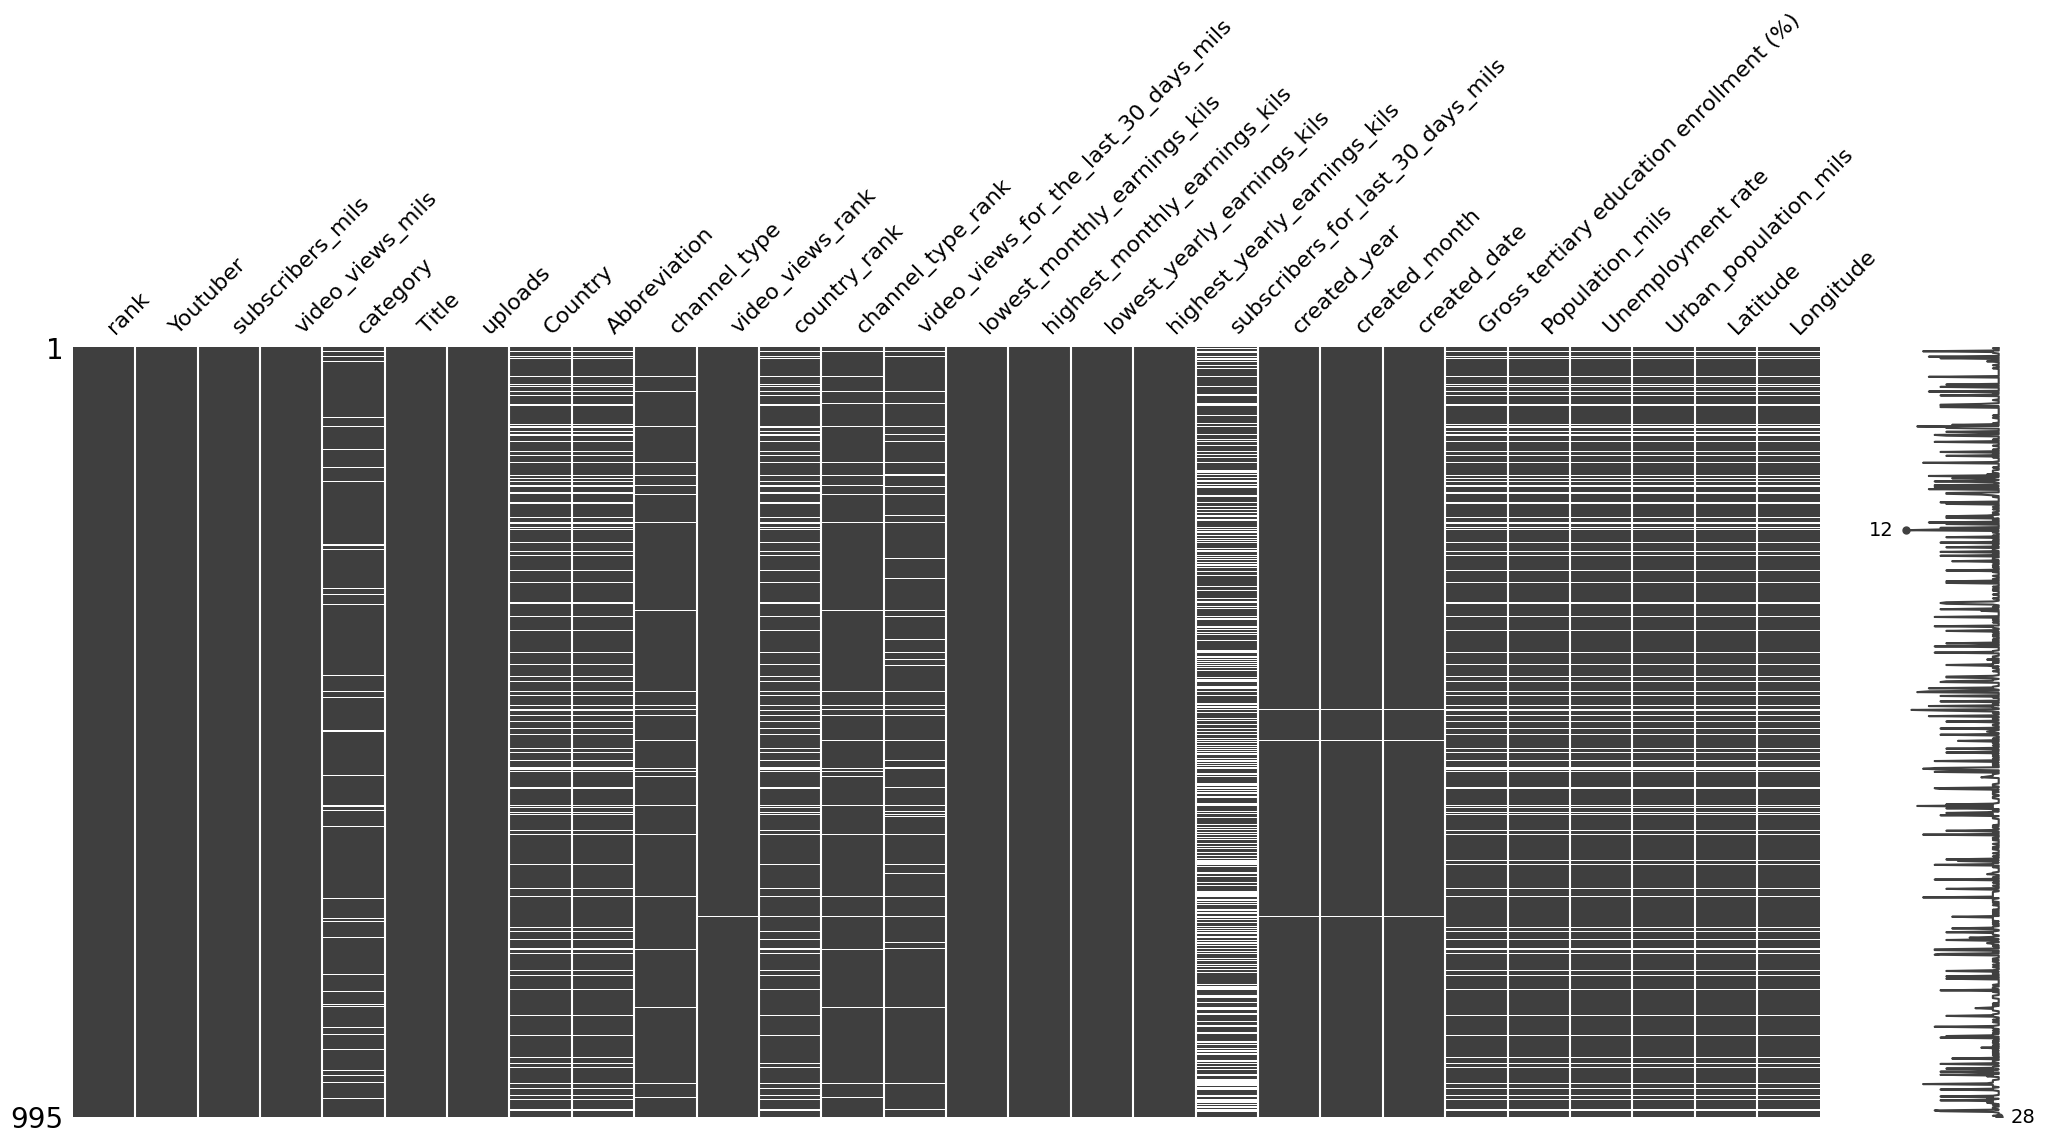

In [7]:
import missingno as msno

msno.matrix(df)

Сначала проведем очевидное заполнение пропусков.

In [8]:
# Заметим, что по пользователям с 0 видео отсутствует много данных (логично). Удалим их
df = df[df['uploads'] != 0]

# category определим по признаку channel_type, т.к. там есть много пересечений
df.loc[df['category'].isna(), 'category'] = df.loc[df['category'].isna(), 'channel_type']

###Country и сопутствующие признаки пробуем определить по subscribers_mils, video_views_mils/uploaded и category и т.п.. Применим метод ML классификации Random Forest:

In [12]:
# Импортируем необходимые модули
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Подготовка данных для модели
data= df[~df['Country'].isna()]

# Разделяем данные на признаки и целевую переменную
X = pd.get_dummies(data[['created_year', 'created_month', 'created_date', 'subscribers_mils', 'video_views_mils', 'uploads', 'category']], columns=['category', 'created_month'])
y = data['Country']

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Создаем и обучаем модель Random Forest
rf_model = RandomForestClassifier(n_estimators= 100, random_state= 42)
rf_model.fit(X_train, y_train)

# Предсказываем значения на тестовом наборе
y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))

                      precision    recall  f1-score   support

             Andorra       0.00      0.00      0.00         1
           Argentina       0.00      0.00      0.00         3
           Australia       0.00      0.00      0.00         1
              Brazil       0.00      0.00      0.00        15
              Canada       0.00      0.00      0.00         2
            Colombia       0.00      0.00      0.00         1
             Germany       0.00      0.00      0.00         1
               India       0.42      0.59      0.49        34
           Indonesia       0.00      0.00      0.00         7
              Jordan       0.00      0.00      0.00         1
              Mexico       0.00      0.00      0.00        10
         Philippines       0.00      0.00      0.00         5
              Russia       0.00      0.00      0.00         5
        Saudi Arabia       0.00      0.00      0.00         3
           Singapore       0.00      0.00      0.00         1
       

**Вывод:** Построить хорошую модель не получилось (многие классы не определяются), проблема в отсутствии признаков, которые сильно связаны с нашей target column. Удалим эти пропуски.

In [13]:
df = df.dropna(subset= 'Country')

### Очень много пропусков в признаке subscribers_for_last_30_days_mils, однако на него напрямую должны влиять признаки: subscribers_mils, video_views_for_the_last_30_days_mils, video_views_mils.                       

Mean Squared Error: 0.2628967633335338




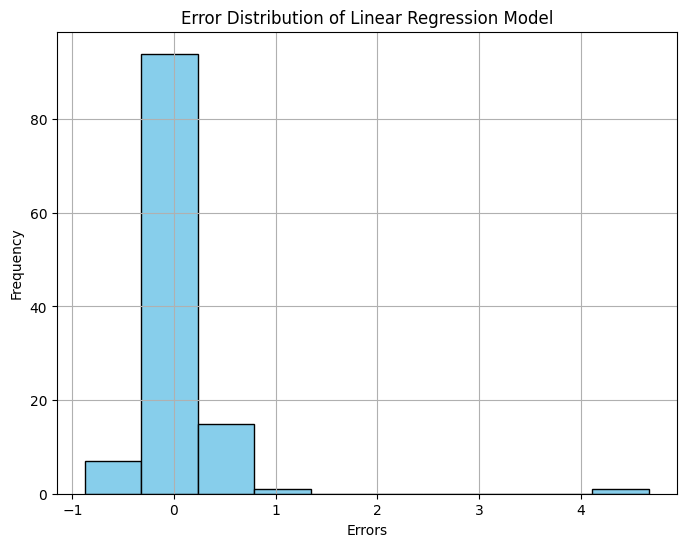

count    589.000000
mean       0.356695
std        0.614639
min        0.000001
25%        0.100000
50%        0.200000
75%        0.400000
max        8.000000
Name: subscribers_for_last_30_days_mils, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Подготовка данных для модели
data = df[~df['subscribers_for_last_30_days_mils'].isna()]

# Разделение данных на признаки(X) и целевую переменную(y)
X = data[['video_views_mils', 'subscribers_mils', 'video_views_for_the_last_30_days_mils']]
y = data['subscribers_for_last_30_days_mils']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = lr_model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print('\n')

errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Error Distribution of Linear Regression Model')
plt.grid(True)
plt.show()

y.describe()

**Вывод:** можем считать, что модель хорошо прогнозирует target. Заполним пропуски с помощью нашей модели.

In [15]:
df = df.dropna(subset='video_views_for_the_last_30_days_mils')

# Получение индексов данных с пропущенными значениями 'subscribers_for_last_30_days_mils'
indexes_to_predict = df[df['subscribers_for_last_30_days_mils'].isna()].index

# Предсказание значений для набора данных с пропущенными значениями
X_to_predict = df.loc[indexes_to_predict, ['video_views_mils', 'subscribers_mils', 'video_views_for_the_last_30_days_mils']]
predicted_values = lr_model.predict(X_to_predict)

# Замена NaN значений предсказанными значениями в исходном датафрейме
df.loc[indexes_to_predict, 'subscribers_for_last_30_days_mils'] = predicted_values

### Теперь осталось мало NaN в признаках, просто удалим их.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     851 non-null    int64  
 1   Youtuber                                 851 non-null    object 
 2   subscribers_mils                         851 non-null    float64
 3   video_views_mils                         851 non-null    float64
 4   category                                 851 non-null    object 
 5   Title                                    851 non-null    object 
 6   uploads                                  851 non-null    int64  
 7   Country                                  851 non-null    object 
 8   Abbreviation                             851 non-null    object 
 9   channel_type                             848 non-null    object 
 10  video_views_rank                         851 non-null  

In [17]:
df = df.dropna()

## Выбросы в данных:

По метрикам можно понять, что в нашем датафрейме данные только по популярным каналам.

In [18]:
df.drop(['Latitude', 'Longitude', 'country_rank', 'channel_type_rank', 'video_views_rank', 'rank', 'created_date', 'created_year'], axis= 1).describe()

,subscribers_mils,video_views_mils,uploads,video_views_for_the_last_30_days_mils,lowest_monthly_earnings_kils,highest_monthly_earnings_kils,lowest_yearly_earnings_kils,highest_yearly_earnings_kils,subscribers_for_last_30_days_mils,Gross tertiary education enrollment (%),Population_mils,Unemployment rate,Urban_population_mils
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,22.971901,11375.838530,10714.560803,182.949772,40.400422,645.931030,484.446383,7756.850084,0.325793,63.559622,435.025822,9.285950,225.875394
std,18.061248,14971.190937,36802.573752,428.143979,73.695084,1178.077063,883.274087,14149.406555,0.534996,26.058206,475.290813,4.890973,154.941564
min,12.300000,0.000000,1.000000,0.000001,0.000000,0.000000,0.000000,0.000000,-0.067704,7.600000,0.202506,0.750000,0.035588
25%,14.500000,4303.897063,336.500000,25.997000,5.800000,92.450000,69.350000,1100.000000,0.100000,36.300000,83.429615,5.360000,55.908316
50%,17.600000,7762.905663,951.000000,71.870000,16.600000,265.100000,198.800000,3200.000000,0.200000,68.000000,328.239523,9.710000,270.663028
75%,24.100000,13829.725589,3410.500000,175.543500,42.050000,672.400000,504.300000,8100.000000,0.302605,88.200000,328.239523,14.700000,270.663028
max,245.000000,228000.000000,301308.000000,6589.000000,850.900000,13600.000000,10200.000000,163400.000000,8.000000,113.100000,1397.715000,14.720000,842.933962


1. Все эти странные 113% в Gross tertiary education enrollment (%) принадлежат Австралии. В интернете такая же информация, видимо это так и есть и 100% для этой метрики не предел.
2. Остальные 'выбросы' в других метриках принадлежат медиа гигантам.
3. Записи с 0 views Это Youtube Movies и Sports. Скорее всего, тк это необычные каналы записи странные. Удалим
4. Записи с 0 доходами это каналы без монетизации.
5. Записи с отрицательными подписчиками за месяц это отписки.

Остальные данные соответствуют реальности.

In [19]:
df.drop(df[df['video_views_mils'] == 0].index, inplace=True)

**Вопрос:** Как распределено число подписчиков?

Картина соответствует реальности, тк в теории распределение должно быть экспоненциальным.

<Axes: xlabel='subscribers_mils', ylabel='Count'>

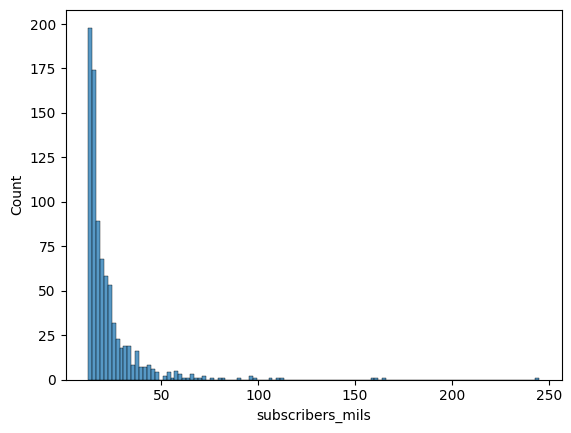

In [20]:
sns.histplot(data=df, x='subscribers_mils')

**Вопрос:** Как распределены данные по странам? Это важно понимать, для будущих выводов.

Больше 50% данных о США, около 25% Индии.

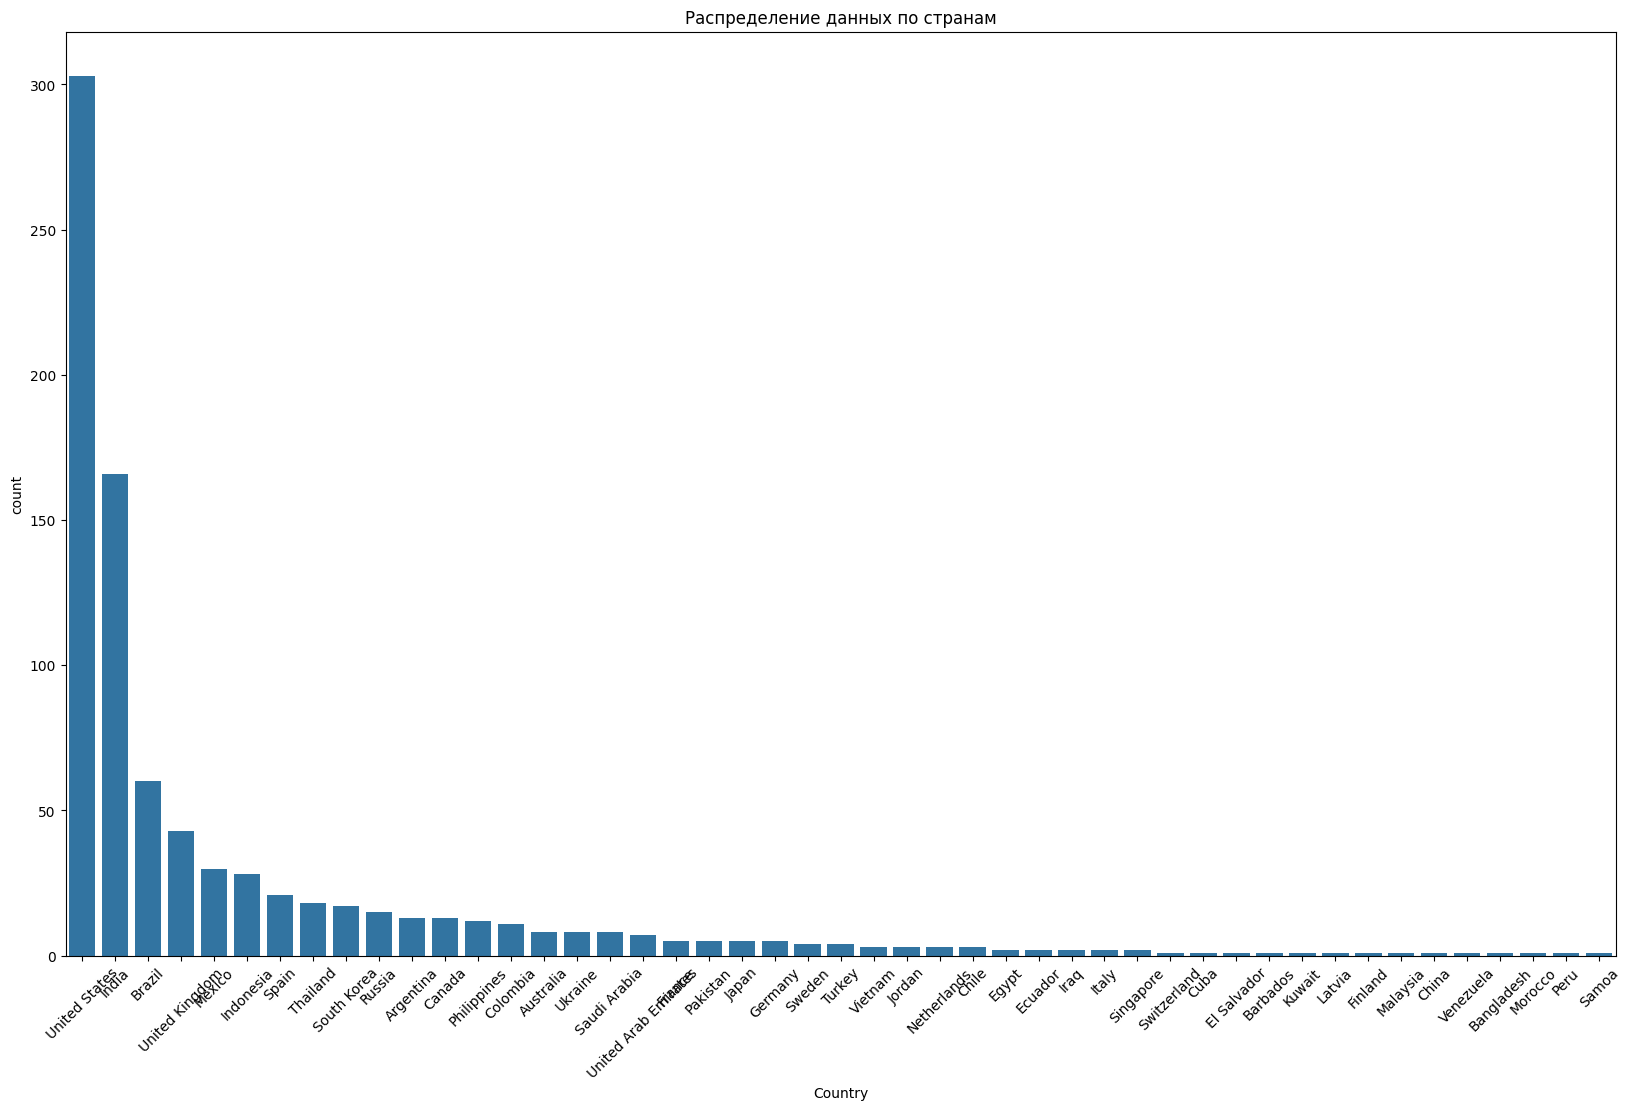

In [21]:
country_count = df['Country'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
plt.title('Распределение данных по странам')
sns.countplot(data=df, x='Country', order=country_count.index)
plt.show()

**Вопрос:** как распределены подписчики по типу канала? Есть ли лидеры, которые покорили все сердца?

Снизу таблица, для того, чтобы учитывать кол-во записей поданых на вход.

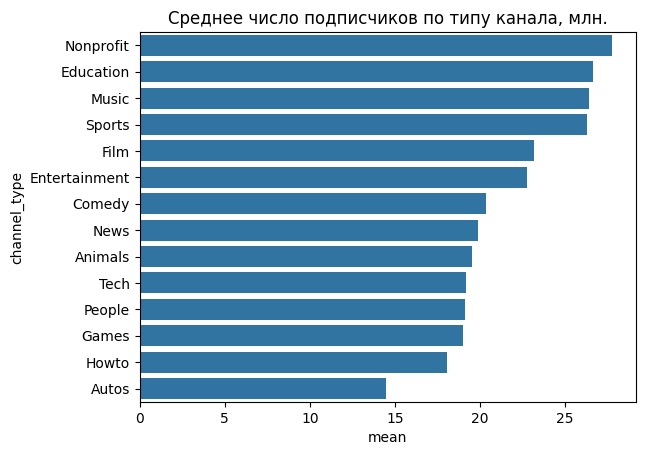

,count,mean
channel_type,,
Nonprofit,2,27.750000
Education,47,26.608511
Music,194,26.372680
Sports,12,26.283333
Film,35,23.168571
Entertainment,283,22.742049
Comedy,46,20.373913
News,29,19.900000
Animals,3,19.533333


In [22]:
median_subs_by_channel_type = df.groupby('channel_type')['subscribers_mils'].agg(['count', 'mean']).sort_values(by='mean', ascending=False)

plt.title('Среднее число подписчиков по типу канала, млн.')
sns.barplot(x=median_subs_by_channel_type['mean'], y=median_subs_by_channel_type.index)
plt.show()

median_subs_by_channel_type

## Исследуем связи и зависимости в данных:

При построении матрицы pairplot заметил, что есть группа сильно коррелирующих признаков. Остальные графики корреляции не показали.

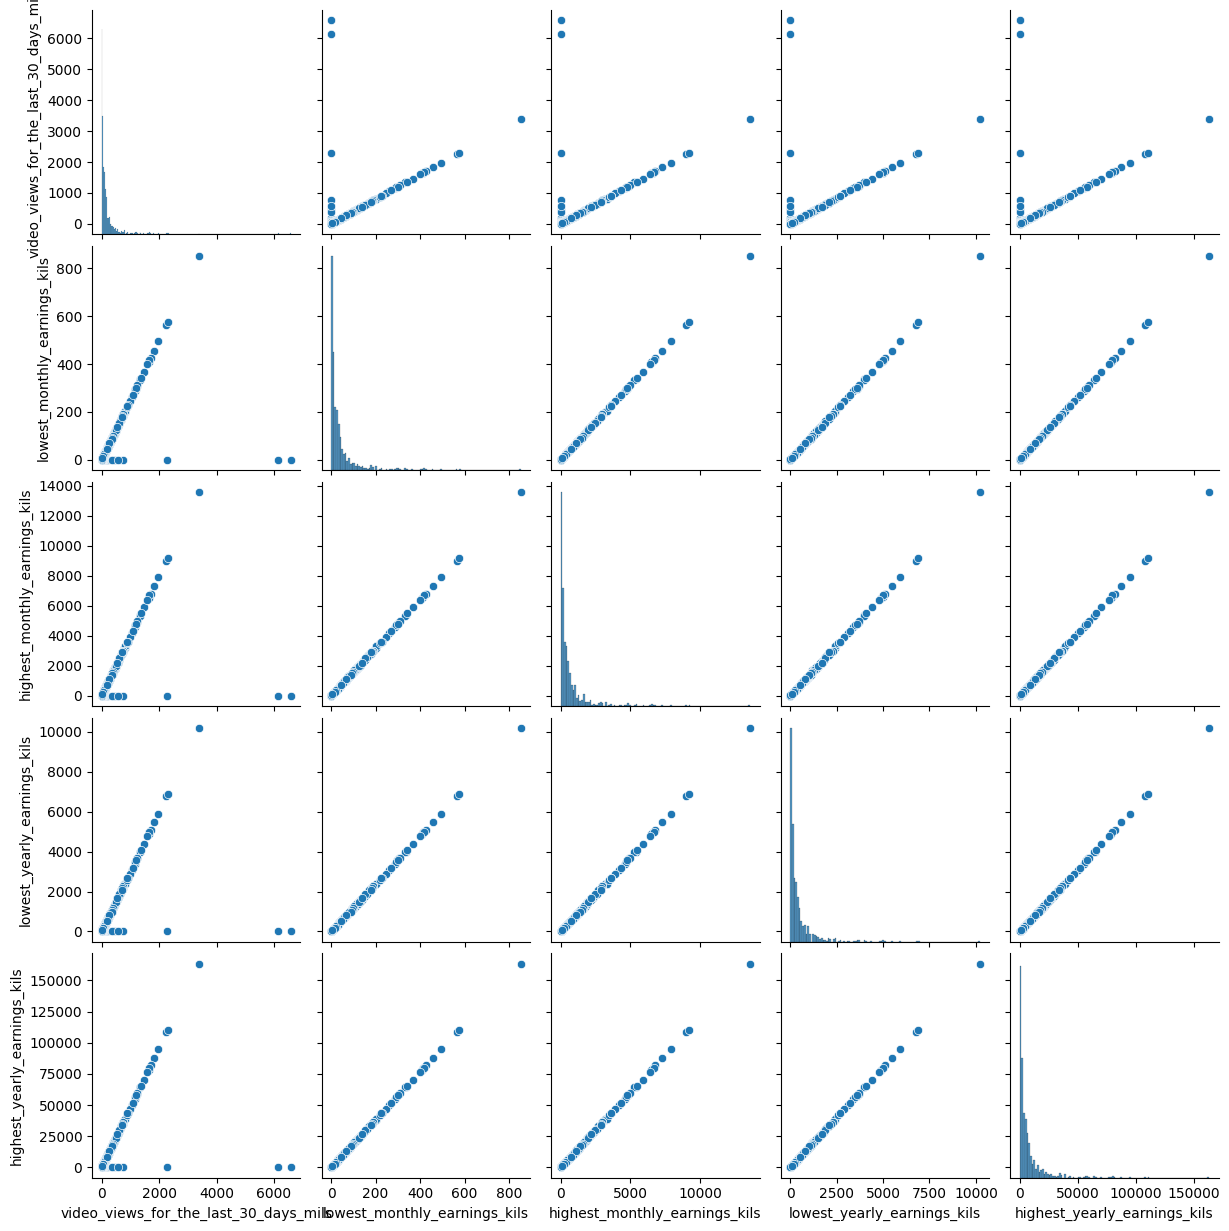

In [23]:
sns.pairplot(data=df[['video_views_for_the_last_30_days_mils','lowest_monthly_earnings_kils','highest_monthly_earnings_kils', 'lowest_yearly_earnings_kils', 'highest_yearly_earnings_kils']])

**Вывод:** Многие зависимочти понятно интерпретируются. Касаемо годовых метрик: Они линейно зависят от других (по месяцам), тк видимо картина тех метрик от месяца к месяцу не меняется и по итогу года просто умножается на 12.

### Гипотеза 1: между подписчиками канала и просмотрами должна быть линейная корреляция

Оказалось, что это так.

In [24]:
df['subscribers_mils'].corr(df['video_views_mils'])

0.8366296353397068

<Axes: xlabel='subscribers_mils', ylabel='video_views_mils'>

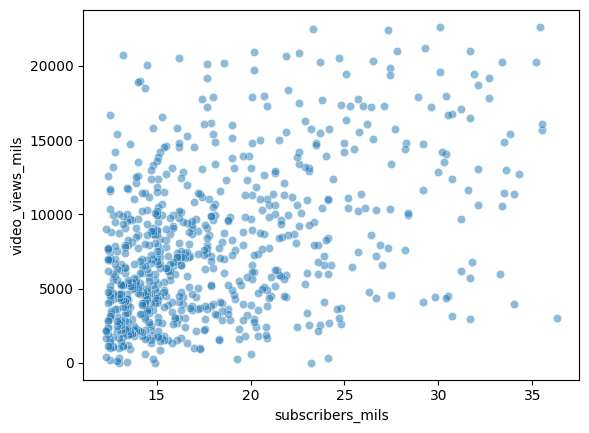

In [28]:
sns.scatterplot(data=df[(df['subscribers_mils'] < df['subscribers_mils'].quantile(0.9)) & (df['video_views_mils'] < df['video_views_mils'].quantile(0.9))], x='subscribers_mils', y='video_views_mils', alpha=0.5)

### Гипотеза 2: Между кол-вом выложенных видео на канале и просмотрами есть связь.

Нет явной связи (но можно заметить, что при росте uploads нижняя граница метрики views стабильно поднимается), тк возможны следующие часто происходящие случаи:
1. Одно видео становится очень виральным
2. Много низшевых видео на фоне других кажутся непопулярными, однако среди ЦА канал может быть очень даже популярным.
3. Влияние внешних факторов также добавляет элемент случайности: Политика, Инсайты, Погода, Праздники. (Хорошо зная, как это влияет на виральность, можно поднять свои видео)
4. Алгоритмы ютуба, которые стараются донести до каждого пользователя интересные ему видео, также добавляют равномерности.

И многие другие факторы по типу тематики, категории канала добавляют неопределенность этой зависимости.

In [31]:
df['uploads'].corr( df['video_views_mils'])

0.16350336476646712

<Axes: xlabel='uploads', ylabel='video_views_mils'>

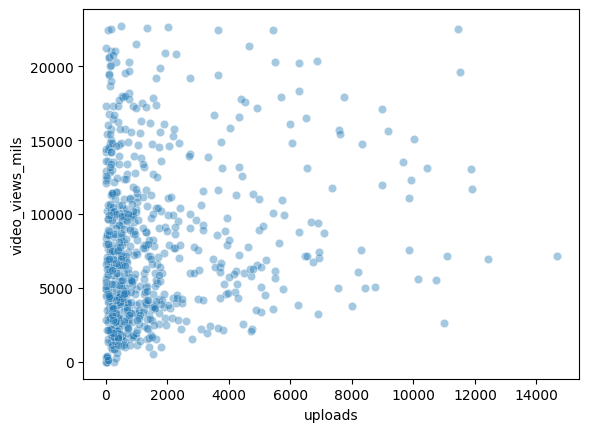

In [29]:
sns.scatterplot(data=df[(df['uploads'] < df['uploads'].quantile(0.9)) & (df['video_views_mils'] < df['video_views_mils'].quantile(0.9))], x='uploads', y='video_views_mils', alpha=0.4)

# Корреляционный анализ

Исследуем корреляцию между числом подписчиков и числом просмотров:

In [32]:
X = df['subscribers_mils']
y = df['video_views_mils']

X.corr(y, method='spearman')

0.5889730609668011

Пирсон говорит, что признаки слабо коррелируюи. Рассмотрим зависимость при помощи линейной регрессии.

Если не вполнять ячейку с удалением записей с 0 просмотрами, то точность увеличилась с 0.65 до 0.68;

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6543333914211433

# Классификация

## Узнаем, какие категории каналов самые популярные

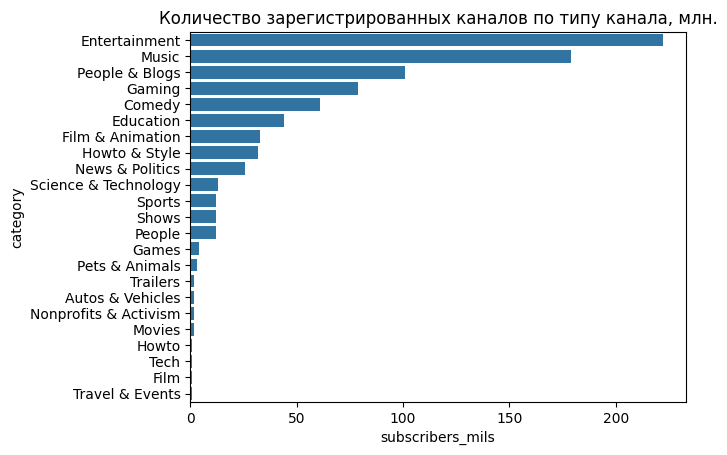

In [34]:
median_subs_by_channel_type = df.groupby('category')['subscribers_mils'].count().sort_values(ascending=False)

plt.title('Количество зарегистрированных каналов по типу канала, млн.')
sns.barplot(x=median_subs_by_channel_type, y=median_subs_by_channel_type.index)
plt.show()

In [35]:
edu_nonp_df = df[df['category'].isin(['Entertainment', 'Music'])]
edu_nonp_df

,rank,Youtuber,subscribers_mils,video_views_mils,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days_mils,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population_mils,Unemployment rate,Urban_population_mils,Latitude,Longitude
0,1,T-Series,245.0,228000.000000,Music,T-Series,20082,India,IN,Music,...,2.000000,2006.0,Mar,13.0,28.1,1366.417754,5.36,471.031528,20.593684,78.962880
2,3,MrBeast,166.0,28368.841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,8.000000,2012.0,Feb,20.0,88.2,328.239523,14.70,270.663028,37.090240,-95.712891
9,10,Vlad and Niki,98.9,77180.169894,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,0.600000,2018.0,Apr,23.0,88.2,328.239523,14.70,270.663028,37.090240,-95.712891
10,11,Zee Music Company,96.7,57856.289381,Music,Zee Music Company,8548,India,IN,Music,...,1.100000,2014.0,Mar,12.0,28.1,1366.417754,5.36,471.031528,20.593684,78.962880
17,18,BANGTANTV,75.6,20826.993957,Music,BANGTANTV,2281,South Korea,KR,Music,...,0.400000,2012.0,Dec,17.0,94.3,51.709098,4.15,42.106719,35.907757,127.766922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,977,SAAIHALILINTAR,12.4,1113.066203,Entertainment,SAAIHALILINTAR,409,Indonesia,ID,Entertainment,...,0.198760,2012.0,Apr,28.0,36.3,270.203917,4.69,151.509724,-0.789275,113.921327
978,979,Heidi and Zidane HZHtube,12.4,4021.409291,Entertainment,Heidi and Zidane HZHtube,813,Canada,CA,Entertainment,...,0.155165,2015.0,Nov,24.0,68.9,36.991981,5.56,30.628482,56.130366,-106.346771
982,983,DisneyChannelUK,12.4,12607.488647,Music,DisneyChannelUK,4422,United Kingdom,GB,Entertainment,...,0.026106,2007.0,Dec,6.0,60.0,66.834405,3.85,55.908316,55.378051,-3.435973
987,988,Avril Lavigne,12.4,6202.090191,Music,Avril Lavigne,205,United States,US,Music,...,0.137915,2005.0,Oct,8.0,88.2,328.239523,14.70,270.663028,37.090240,-95.712891


### Выбираем нужные признаки

In [43]:
X = edu_nonp_df[['subscribers_mils', 'video_views_mils', 'uploads']]

### Второй вариант выбора признаков (постараемся взять именно те, которые не должны влиять на целевой признак

In [41]:
X = edu_nonp_df[['created_year', 'Gross tertiary education enrollment (%)', 'Unemployment rate']]

Соберем модель Логистической регрессии. score = 0.68

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['Entertainment', 'Music'])
y = le.transform(edu_nonp_df['category'])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lf = LogisticRegression()
lf.fit(X_train, y_train)

lf.score(X_test, y_test)

0.6790123456790124